<a href="https://colab.research.google.com/github/nidub/Mental_Health_Corpus/blob/main/Mental_Health_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/mental_health.csv')

In [5]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [6]:
df.tail()

,text,label
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1
27976,got nudes person might might know snapchat do ...,0


In [7]:
df.shape

(27977, 2)

In [8]:
df.columns

Index(['text', 'label'], dtype='object')

In [9]:
df.duplicated().sum()

5

In [10]:
df = df.drop_duplicates()

In [11]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27972 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27972 non-null  object
 1   label   27972 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 655.6+ KB


In [13]:
df['label'].unique()

array([0, 1])

In [14]:
df['label'].value_counts()

0    14134
1    13838
Name: label, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings('ignore')

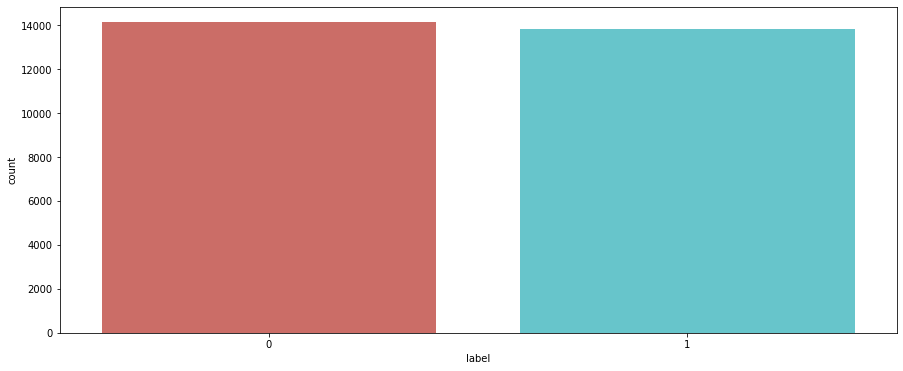

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(df['label'], data = df, 
             palette = 'hls')
plt.show()

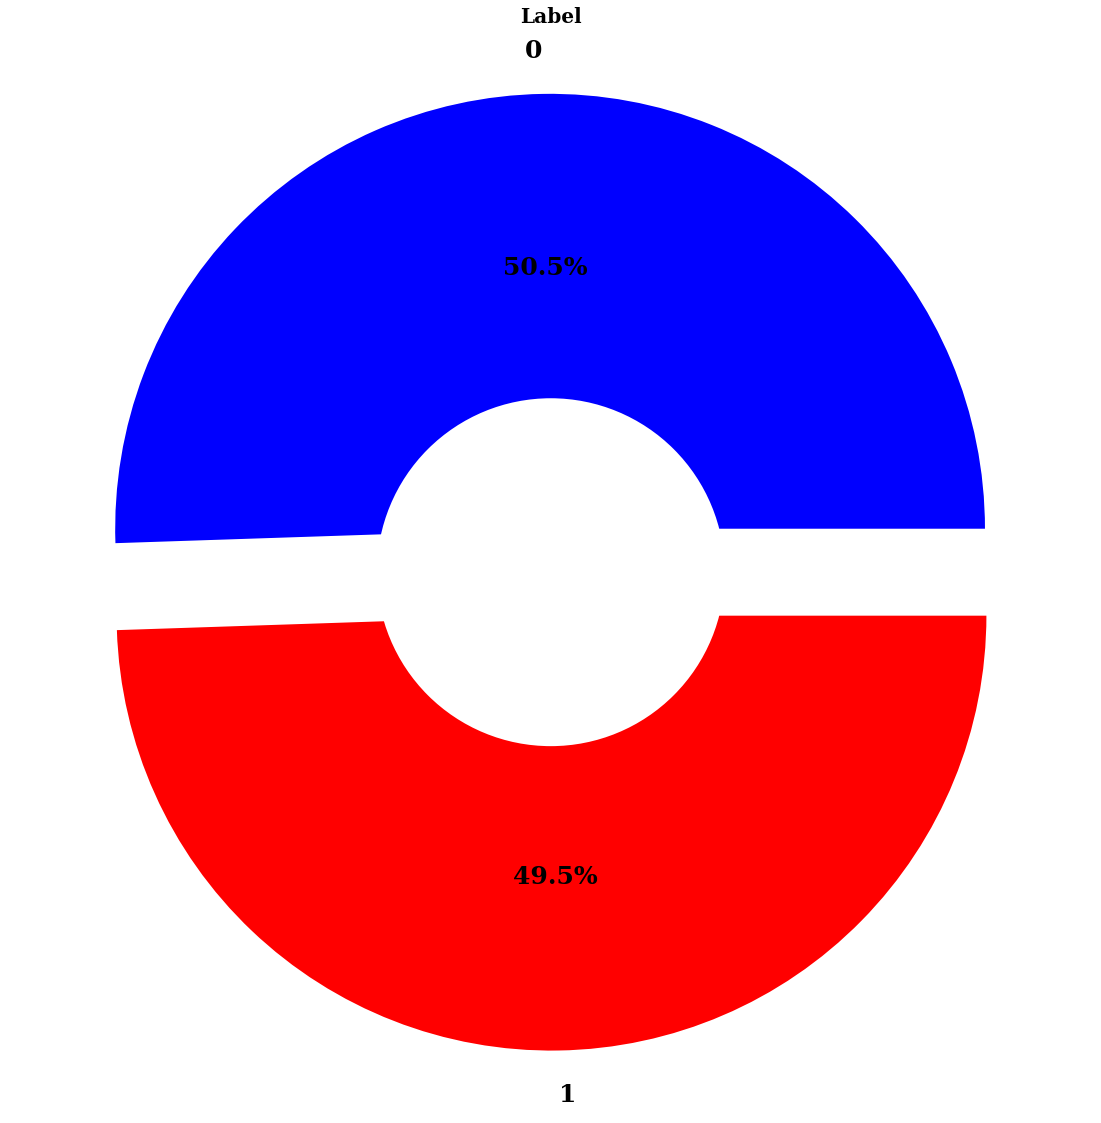

In [18]:
label_data = df['label'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(30, 20))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               shadow = False,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [19]:
df['Total Words'] = df['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['Total Chars'] = df["text"].apply(count_total_words)

In [20]:
df

,text,label,Total Words,Total Chars
0,dear american teens question dutch person hear...,0,23,112
1,nothing look forward lifei dont many reasons k...,1,20,98
2,music recommendations im looking expand playli...,0,64,387
3,im done trying feel betterthe reason im still ...,1,100,493
4,worried year old girl subject domestic physic...,1,311,1819
...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,28,172
27973,okay definetly need hear guys opinion ive pret...,0,163,812
27974,cant get dog think ill kill myselfthe last thi...,1,33,157
27975,whats point princess bridei really think like ...,1,96,507


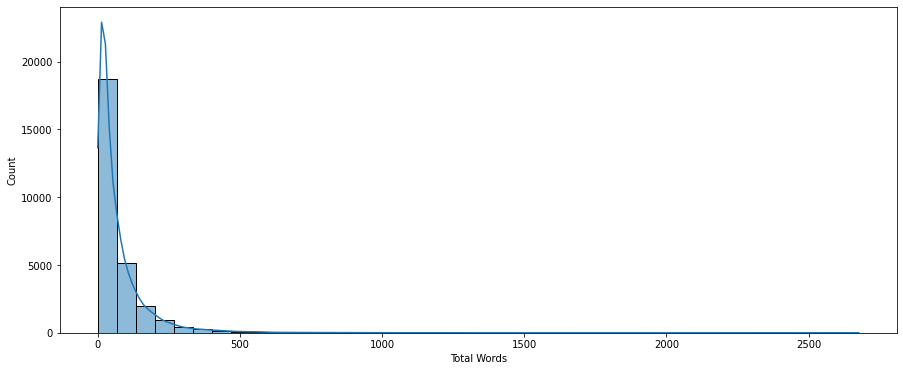

In [21]:
plt.figure(figsize=(15,6))
sns.histplot(df['Total Words'], bins = 40, kde = True, palette = 'hls')
plt.show()

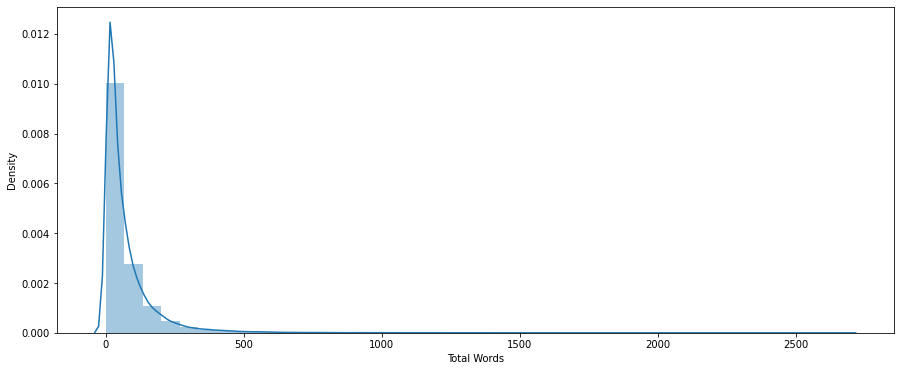

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(df['Total Words'], bins = 40, kde = True)
plt.show()

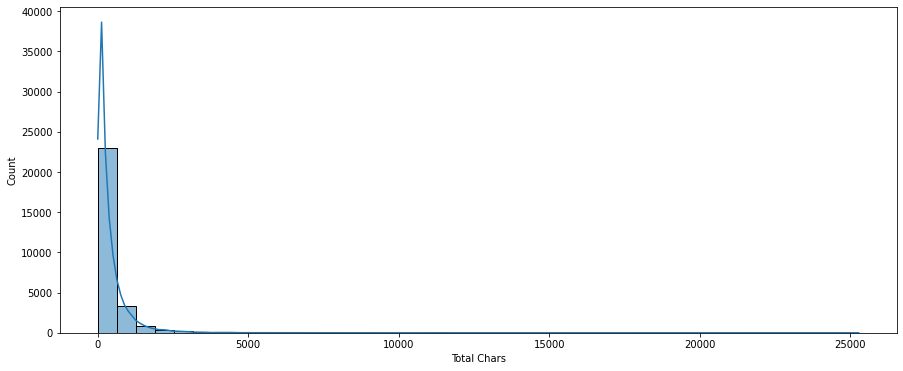

In [23]:
plt.figure(figsize=(15,6))
sns.histplot(df['Total Chars'], bins = 40, kde = True, palette = 'hls')
plt.show()

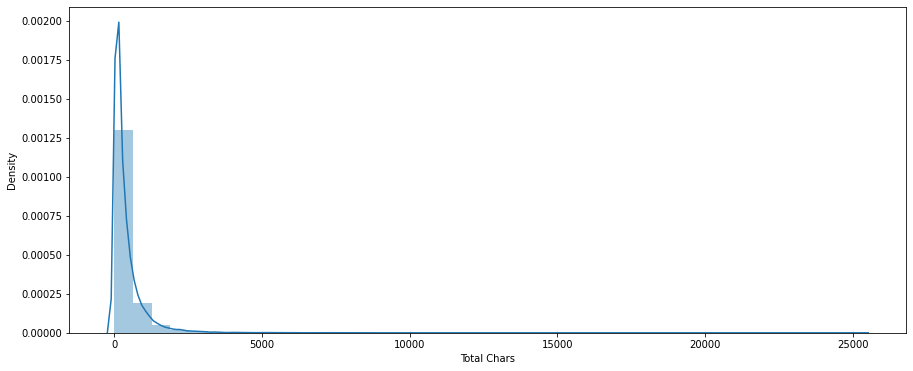

In [24]:
plt.figure(figsize=(15,6))
sns.distplot(df['Total Chars'], bins = 40, kde = True)
plt.show()

In [25]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import numpy as np
import re
import string

In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [28]:
!pip install contractions
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 9.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=8da74f8c81c8bc3d89623147d31cb00c0aa770eae436be6df472c7666bb428f2
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5

In [29]:
import swifter
import contractions

In [30]:
def remove_special_chars(text):
        import re
        import html
        
        re1 = re.compile(r'  +')
        x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
            'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
            '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
            ' @-@ ', '-').replace('\\', ' \\ ')
        return re1.sub(' ', html.unescape(x1))

def decontracted(text):
      '''
      Function to expand the shotened words: what've ---> what have
      '''
      expanded_words = []    
      for word in text.split():
        # using contractions.fix to expand the shotened words
        expanded_words.append(contractions.fix(word))   

      expanded_text = ' '.join(expanded_words)
      return expanded_text
       
def preprocess_text(text):
    # remove URLs
    newtext = re.sub(r'http\S+', '', text)
    
    # convert text to lowercase
    newtext = newtext.lower()
    
    # remove numbers and punctuation
    newtext = re.sub(r'\d+', '', newtext)
    newtext = re.sub(r'[^\w\s]', '', newtext)
    
    # tokenize text into words
    words = word_tokenize(newtext)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # stem words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # join words back into text
    newtext = ' '.join(words)
    
    # tokenize text into sentences
    sentences = sent_tokenize(newtext)
    
    return " ".join(sentences)

In [31]:
df['newtext'] = df['text'].apply(remove_special_chars)
df['newtext'] = df['newtext'].apply(decontracted)
df['newtext'] = df['newtext'].apply(preprocess_text)

In [32]:
df

,text,label,Total Words,Total Chars,newtext
0,dear american teens question dutch person hear...,0,23,112,dear american teen question dutch person heard...
1,nothing look forward lifei dont many reasons k...,1,20,98,noth look forward lifei mani reason keep go fe...
2,music recommendations im looking expand playli...,0,64,387,music recommend look expand playlist usual gen...
3,im done trying feel betterthe reason im still ...,1,100,493,done tri feel betterth reason still aliv know ...
4,worried year old girl subject domestic physic...,1,311,1819,worri year old girl subject domest physicalmen...
...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,28,172,post everyday peopl stop care religion matter ...
27973,okay definetly need hear guys opinion ive pret...,0,163,812,okay definetli need hear guy opinion pretti mu...
27974,cant get dog think ill kill myselfthe last thi...,1,33,157,get dog think ill kill myselfth last thing hol...
27975,whats point princess bridei really think like ...,1,96,507,point princess bridei realli think like wesley...


In [33]:
df['Total New Words'] = df['newtext'].apply(lambda x: len(x.split()))

# Tokenize the text column into words
df['words'] = df['newtext'].apply(nltk.word_tokenize)

# Create a dictionary of word frequency for the entire dataset
word_freq = Counter(word for words in df['words'] for word in words)

# Calculate word frequency for each row and append to a new column
df['word_freq'] = df['words'].apply(lambda words: [word_freq[word] for word in words])

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['Total New Chars'] = df["newtext"].apply(count_total_words)

In [34]:
df

,text,label,Total Words,Total Chars,newtext,Total New Words,words,word_freq,Total New Chars
0,dear american teens question dutch person hear...,0,23,112,dear american teen question dutch person heard...,23,"[dear, american, teen, question, dutch, person...","[108, 438, 377, 1194, 28, 4515, 578, 3200, 177...",106
1,nothing look forward lifei dont many reasons k...,1,20,98,noth look forward lifei mani reason keep go fe...,18,"[noth, look, forward, lifei, mani, reason, kee...","[4670, 4750, 589, 91, 3195, 3190, 4147, 17627,...",73
2,music recommendations im looking expand playli...,0,64,387,music recommend look expand playlist usual gen...,60,"[music, recommend, look, expand, playlist, usu...","[1166, 461, 4750, 33, 54, 911, 157, 46, 206, 2...",321
3,im done trying feel betterthe reason im still ...,1,100,493,done tri feel betterth reason still aliv know ...,81,"[done, tri, feel, betterth, reason, still, ali...","[2839, 9722, 20446, 4, 3190, 5408, 1276, 18289...",370
4,worried year old girl subject domestic physic...,1,311,1819,worri year old girl subject domest physicalmen...,295,"[worri, year, old, girl, subject, domest, phys...","[1145, 10557, 2527, 3231, 306, 35, 2, 1, 17627...",1511
...,...,...,...,...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,28,172,post everyday peopl stop care religion matter ...,27,"[post, everyday, peopl, stop, care, religion, ...","[3485, 942, 11618, 3687, 4529, 156, 1706, 188,...",143
27973,okay definetly need hear guys opinion ive pret...,0,163,812,okay definetli need hear guy opinion pretti mu...,144,"[okay, definetli, need, hear, guy, opinion, pr...","[957, 5, 6006, 1145, 3200, 462, 2134, 7547, 71...",651
27974,cant get dog think ill kill myselfthe last thi...,1,33,157,get dog think ill kill myselfth last thing hol...,26,"[get, dog, think, ill, kill, myselfth, last, t...","[17769, 795, 11291, 4340, 5914, 4, 4163, 9808,...",115
27975,whats point princess bridei really think like ...,1,96,507,point princess bridei realli think like wesley...,88,"[point, princess, bridei, realli, think, like,...","[3696, 33, 1, 10283, 11291, 23701, 6, 3310, 7,...",415


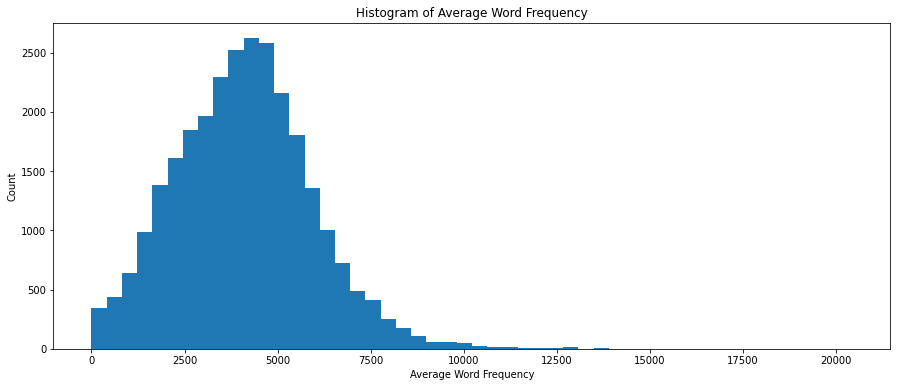

In [37]:
# Calculate the average word frequency for each sentence
df['avg_word_freq'] = df['word_freq'].apply(lambda x: np.mean(x))

# Plot a histogram of the frequency distribution
plt.figure(figsize=(15,6))
plt.hist(df['avg_word_freq'], bins=50)
plt.xlabel('Average Word Frequency')
plt.ylabel('Count')
plt.title('Histogram of Average Word Frequency')
plt.show()

In [39]:

class EDA:
  def __init__(self, df, col):
    self.df = df
    self.col = col
    self.word_freq = self.df[col].apply(self.check_word_frequency)
    self.WORDS = self.get_all_words()

  def get_all_words(self):
    WORDS = self.df[self.col].str.split().values.tolist()
    WORDS = [w for seq in WORDS for w in seq]    # list of all words from corpus
    return WORDS

  def check_word_frequency(self, text):
      return len(str(text).split(' '))

  def plot_word_counts(self):
      sns.set_style('darkgrid')
      fig = plt.figure(figsize=(10,5))

      plt.hist(self.word_freq, bins=10, color='#30105C')
      
      plt.title('Distribution - Word Frequency', fontsize=16)
      plt.xlabel('Word Frequncy', fontsize=12)
      plt.ylabel('Frequency', fontsize=12)
      plt.show()

  def find_ngram(self, word, n):
      word_fd = nltk.FreqDist(word)
      n_gram_fd = nltk.FreqDist(nltk.ngrams(word, n))
      return word_fd, n_gram_fd

  def ngram_plot(self, n):
    unigram_word_fd, unigram = self.find_ngram(self.WORDS, n)
    pd.DataFrame(unigram.most_common(30), columns = ['word', 'count']).plot.barh(x = 'word', figsize=(10, 12))
    plt.show()
    # print(unigram.most_common(20))

In [40]:
col = 'newtext'
eda_obj = EDA(df, col)

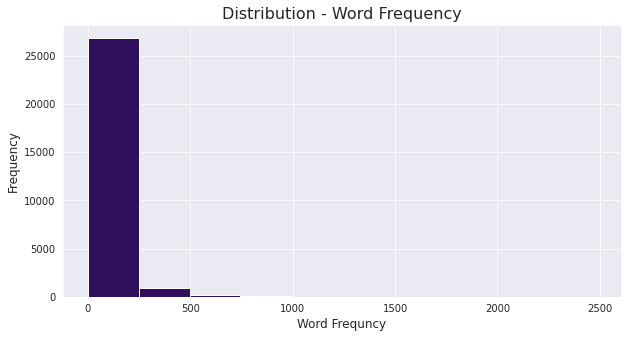

In [41]:
eda_obj.plot_word_counts()

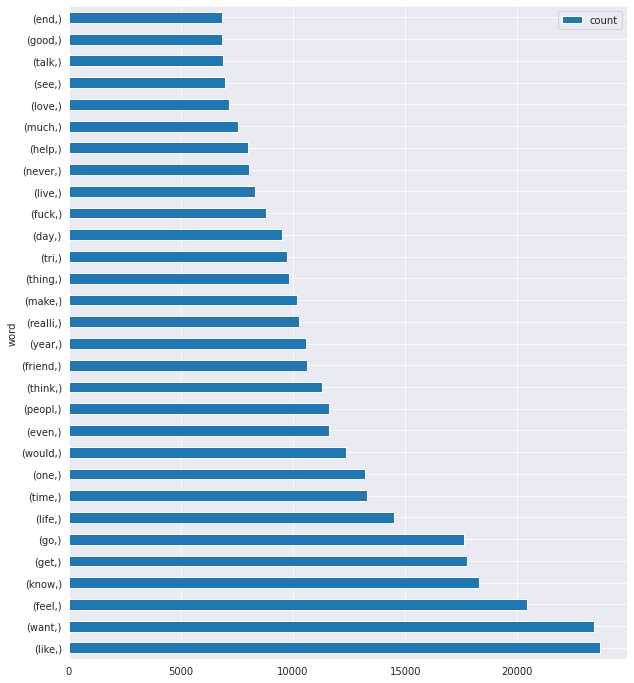

In [42]:
eda_obj.ngram_plot(1)

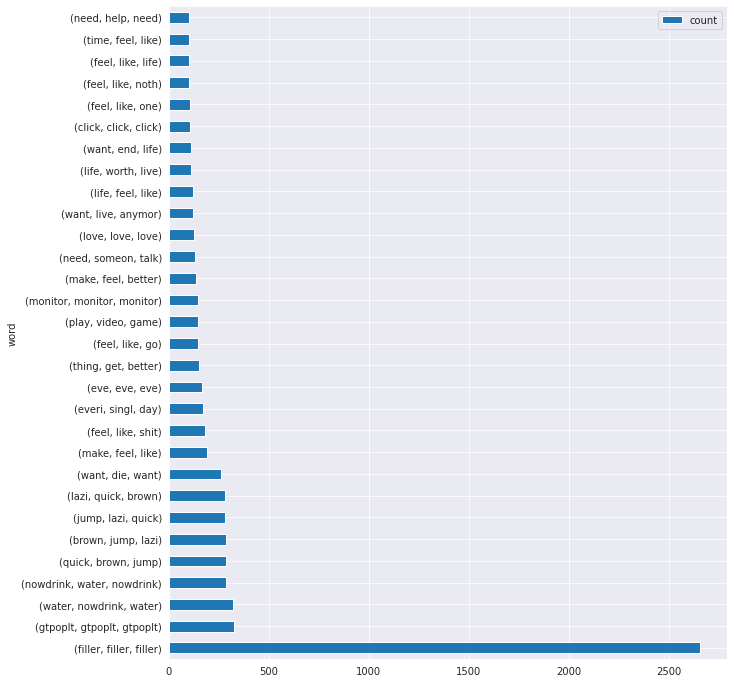

In [43]:
eda_obj.ngram_plot(3)

In [44]:
import numpy as np

In [45]:
df['Total Words After Transformation'] = df['newtext'].apply(lambda x: np.log(len(x.split())))

In [46]:
df

,text,label,Total Words,Total Chars,newtext,Total New Words,words,word_freq,Total New Chars,avg_word_freq,Total Words After Transformation
0,dear american teens question dutch person hear...,0,23,112,dear american teen question dutch person heard...,23,"[dear, american, teen, question, dutch, person...","[108, 438, 377, 1194, 28, 4515, 578, 3200, 177...",106,3588.782609,3.135494
1,nothing look forward lifei dont many reasons k...,1,20,98,noth look forward lifei mani reason keep go fe...,18,"[noth, look, forward, lifei, mani, reason, kee...","[4670, 4750, 589, 91, 3195, 3190, 4147, 17627,...",73,8602.555556,2.890372
2,music recommendations im looking expand playli...,0,64,387,music recommend look expand playlist usual gen...,60,"[music, recommend, look, expand, playlist, usu...","[1166, 461, 4750, 33, 54, 911, 157, 46, 206, 2...",321,1906.916667,4.094345
3,im done trying feel betterthe reason im still ...,1,100,493,done tri feel betterth reason still aliv know ...,81,"[done, tri, feel, betterth, reason, still, ali...","[2839, 9722, 20446, 4, 3190, 5408, 1276, 18289...",370,6703.654321,4.394449
4,worried year old girl subject domestic physic...,1,311,1819,worri year old girl subject domest physicalmen...,295,"[worri, year, old, girl, subject, domest, phys...","[1145, 10557, 2527, 3231, 306, 35, 2, 1, 17627...",1511,2657.650847,5.686975
...,...,...,...,...,...,...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,28,172,post everyday peopl stop care religion matter ...,27,"[post, everyday, peopl, stop, care, religion, ...","[3485, 942, 11618, 3687, 4529, 156, 1706, 188,...",143,2554.444444,3.295837
27973,okay definetly need hear guys opinion ive pret...,0,163,812,okay definetli need hear guy opinion pretti mu...,144,"[okay, definetli, need, hear, guy, opinion, pr...","[957, 5, 6006, 1145, 3200, 462, 2134, 7547, 71...",651,5330.708333,4.969813
27974,cant get dog think ill kill myselfthe last thi...,1,33,157,get dog think ill kill myselfth last thing hol...,26,"[get, dog, think, ill, kill, myselfth, last, t...","[17769, 795, 11291, 4340, 5914, 4, 4163, 9808,...",115,4398.615385,3.258097
27975,whats point princess bridei really think like ...,1,96,507,point princess bridei realli think like wesley...,88,"[point, princess, bridei, realli, think, like,...","[3696, 33, 1, 10283, 11291, 23701, 6, 3310, 7,...",415,4953.488636,4.477337


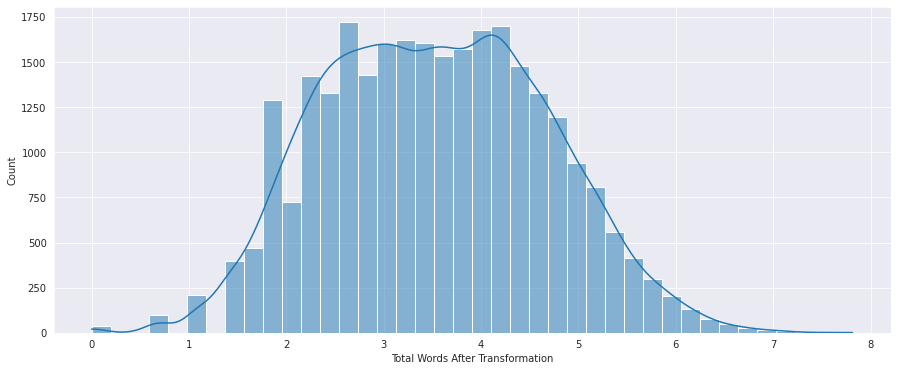

In [47]:
plt.figure(figsize=(15,6))
sns.histplot(df['Total Words After Transformation'], bins = 40, kde = True, palette = 'hls')
plt.show()

In [48]:
from wordcloud import WordCloud, STOPWORDS

In [49]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

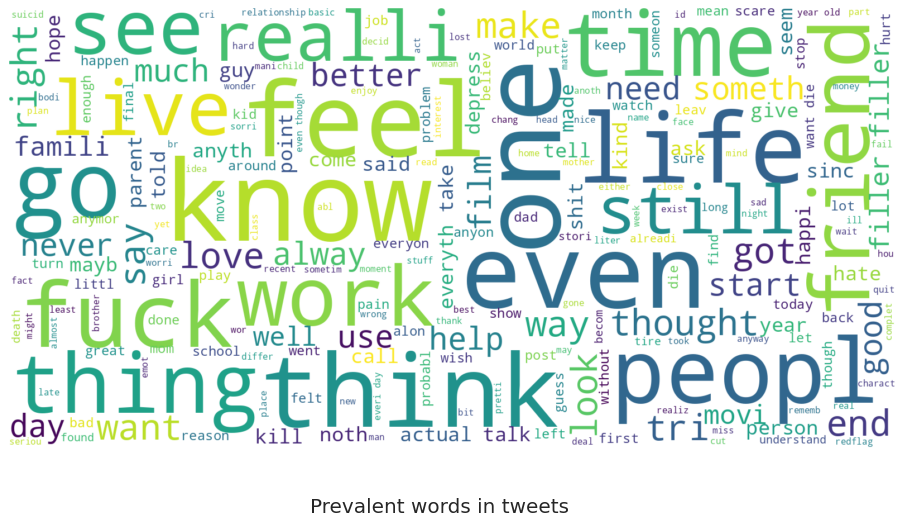

In [50]:
show_wordcloud(df['newtext'], title = 'Prevalent words in tweets')

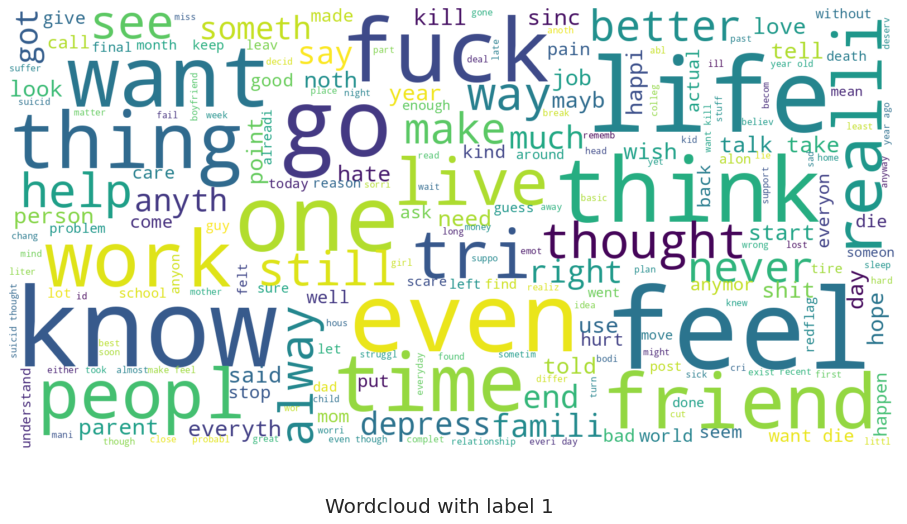

In [51]:
show_wordcloud(df[df['label'] == 1]['newtext'], title = 'Wordcloud with label 1')

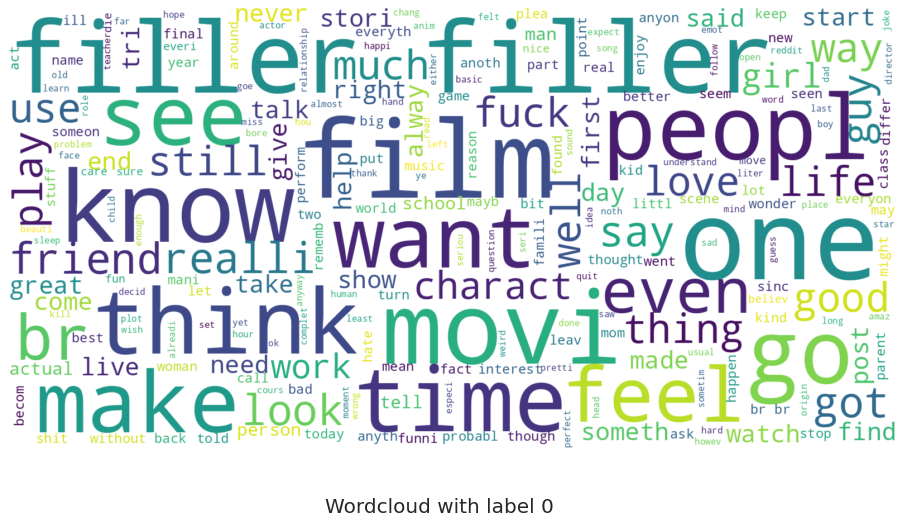

In [52]:
show_wordcloud(df[df['label'] == 0]['newtext'], title = 'Wordcloud with label 0')

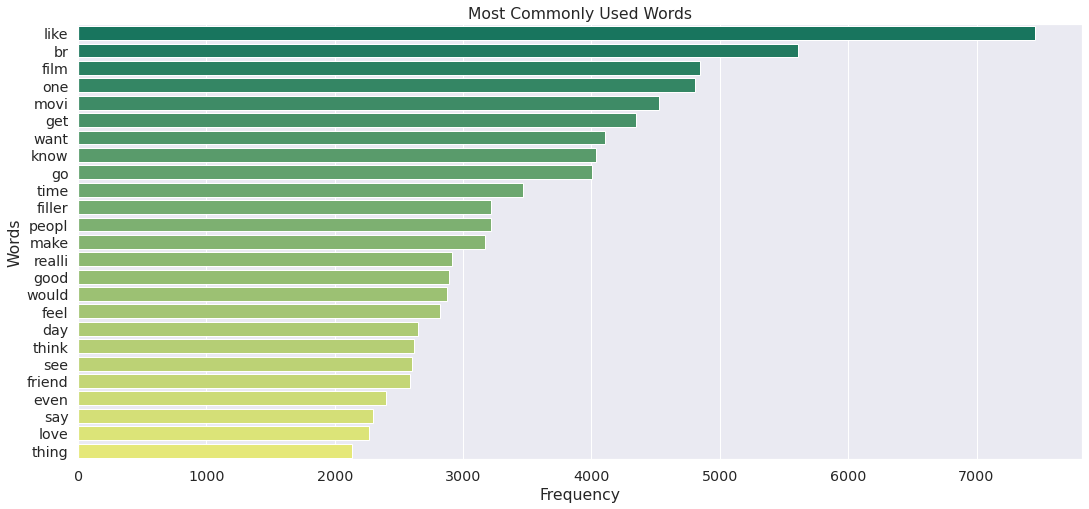

In [53]:
all_spam_words = []
for sentence in df[df['label'] == 0]['newtext'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df1 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

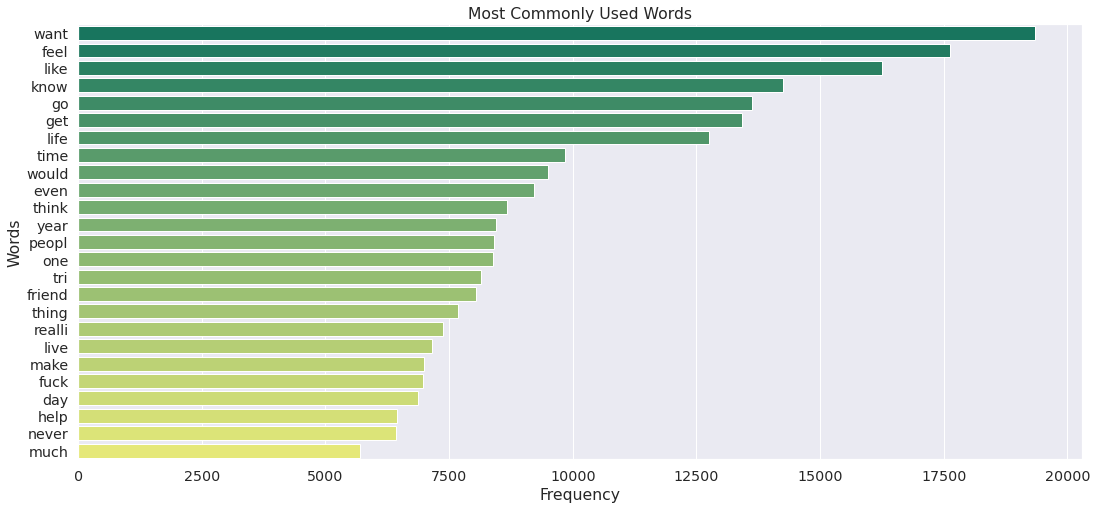

In [54]:
all_spam_words = []
for sentence in df[df['label'] == 1]['newtext'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df2 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df2['Word'], x= df2['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [55]:
from sklearn.model_selection import train_test_split 

In [56]:
X = df["text"]
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [57]:
!pip install scikit-plot
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.2 MB/s eta 0:00:00


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from scikitplot.metrics import plot_confusion_matrix, plot_roc

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import time
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras_preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

In [59]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = lr.predict(X_test)

In [62]:
print('Model accuracy:', accuracy_score(y_test, y_pred))

Model accuracy: 0.9156389633601429


In [63]:
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)  

In [64]:
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}') 

Precision Score of the model: 0.924
Recall Score of the model: 0.904


In [65]:
cm = confusion_matrix(y_test, y_pred)

In [66]:
cm

array([[2621,  206],
       [ 266, 2502]])

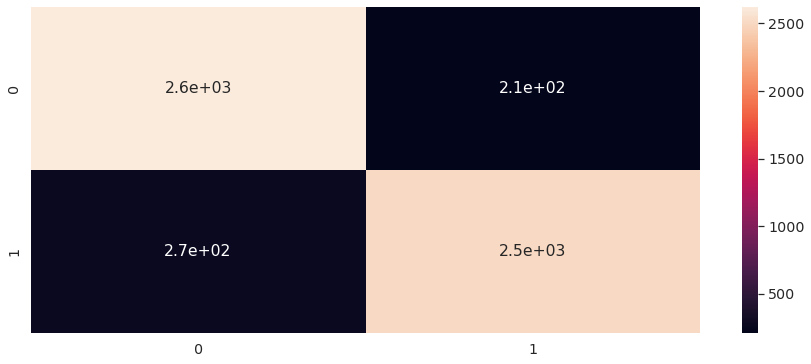

In [67]:
plt.figure(figsize=(15,6))
sns.heatmap(cm, annot = True)
plt.show()

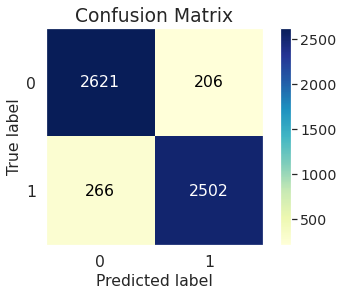

In [68]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

In [69]:
y_prob = lr.predict_proba(X_test)

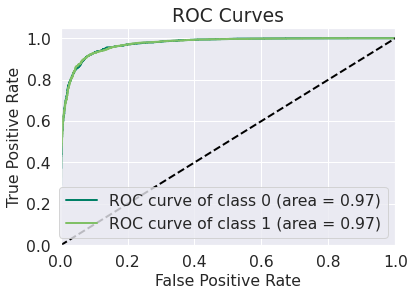

In [70]:
plot_roc(y_test, y_prob, plot_macro= False, plot_micro= False, cmap= 'summer')
plt.show()

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2827
           1       0.92      0.90      0.91      2768

    accuracy                           0.92      5595
   macro avg       0.92      0.92      0.92      5595
weighted avg       0.92      0.92      0.92      5595



In [72]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [73]:
y_pred = svc.predict(X_test)

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9202859696157283
Precision: 0.9293639053254438
Recall: 0.9078757225433526
F1 Score: 0.9184941520467836


In [75]:
cm = confusion_matrix(y_test, y_pred)

In [76]:
cm

array([[2636,  191],
       [ 255, 2513]])

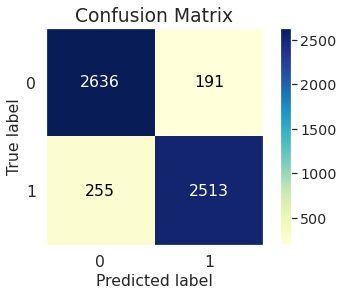

In [77]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2827
           1       0.93      0.91      0.92      2768

    accuracy                           0.92      5595
   macro avg       0.92      0.92      0.92      5595
weighted avg       0.92      0.92      0.92      5595



In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred = dt.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8291331546023235


In [82]:
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)  

In [83]:
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}') 

Precision Score of the model: 0.828
Recall Score of the model: 0.827


In [84]:
cm = confusion_matrix(y_test, y_pred)

In [85]:
cm

array([[2351,  476],
       [ 480, 2288]])

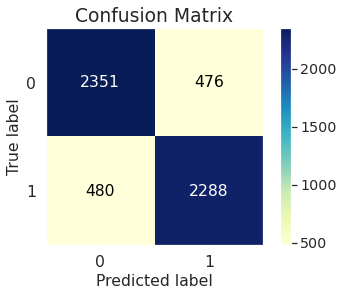

In [86]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

In [87]:
y_prob = dt.predict_proba(X_test)

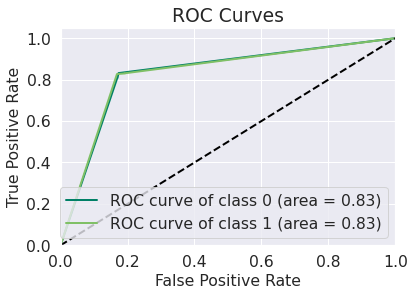

In [88]:
plot_roc(y_test, y_prob, plot_macro= False, plot_micro= False, cmap= 'summer')
plt.show()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2827
           1       0.83      0.83      0.83      2768

    accuracy                           0.83      5595
   macro avg       0.83      0.83      0.83      5595
weighted avg       0.83      0.83      0.83      5595



In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred = rfc.predict(X_test)

In [92]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8881143878462914
Precision: 0.8795180722891566
Recall: 0.8966763005780347
F1 Score: 0.8880143112701252


In [93]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2487  340]
 [ 286 2482]]


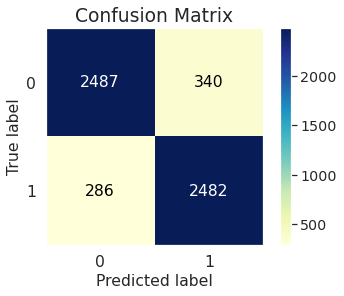

In [94]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

In [95]:
y_prob = rfc.predict_proba(X_test)

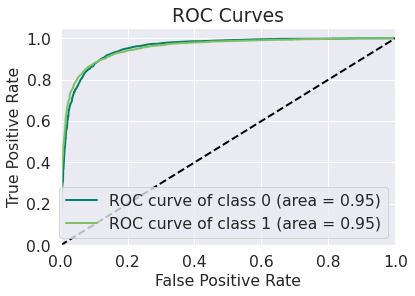

In [96]:
plot_roc(y_test, y_prob, plot_macro= False, plot_micro= False, cmap= 'summer')
plt.show()

In [97]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2827
           1       0.88      0.90      0.89      2768

    accuracy                           0.89      5595
   macro avg       0.89      0.89      0.89      5595
weighted avg       0.89      0.89      0.89      5595



In [98]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [99]:
y_pred = mnb.predict(X_test)

In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8836461126005362
Precision: 0.8361384566529056
Recall: 0.951228323699422
F1 Score: 0.889978029406794


In [101]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2311  516]
 [ 135 2633]]


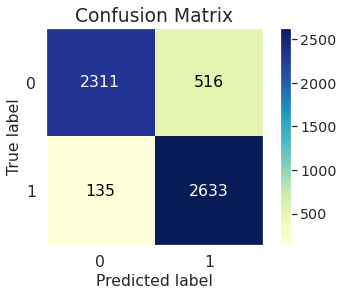

In [102]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

In [103]:
y_prob = mnb.predict_proba(X_test)

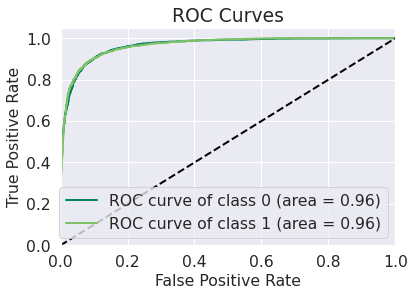

In [104]:
plot_roc(y_test, y_prob, plot_macro= False, plot_micro= False, cmap= 'summer')
plt.show()

In [105]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      2827
           1       0.84      0.95      0.89      2768

    accuracy                           0.88      5595
   macro avg       0.89      0.88      0.88      5595
weighted avg       0.89      0.88      0.88      5595



In [106]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math 

After Tokenization & Padding 
 [2199  911 1713  514   85  573  200    7   31  816   30  754  404  161
    2   59  200  754 1324    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [107]:
y = df.label
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (15663, 100) (15663,)
Validation Set: (6714, 100) (6714,)
Test Set:       (5595, 100) (5595,)


In [108]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=[tf.keras.metrics.Recall(),'accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 50, 64)           16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                        

In [110]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
245/245 [==============================] - 57s 189ms/step - loss: 0.3399 - recall: 0.8521 - accuracy: 0.8488 - val_loss: 0.2080 - val_recall: 0.9178 - val_accuracy: 0.9208
Epoch 2/50
245/245 [==============================] - 40s 161ms/step - loss: 0.1759 - recall: 0.9341 - accuracy: 0.9361 - val_loss: 0.2155 - val_recall: 0.9356 - val_accuracy: 0.9154
Epoch 3/50
245/245 [==============================] - 36s 148ms/step - loss: 0.1406 - recall: 0.9541 - accuracy: 0.9522 - val_loss: 0.2216 - val_recall: 0.9196 - val_accuracy: 0.9154
Epoch 4/50
245/245 [==============================] - 40s 164ms/step - loss: 0.1087 - recall: 0.9675 - accuracy: 0.9634 - val_loss: 0.2495 - val_recall: 0.9079 - val_accuracy: 0.9102
Epoch 5/50
245/245 [==============================] - 42s 173ms/step - loss: 0.0887 - recall: 0.9760 - accuracy: 0.9738 - val_loss: 0.2926 - val_recall: 0.9094 - val_accuracy: 0.9060
Epoch 6/50
245/245 [==============================] - 63s 259ms/step - loss: 0.0717 -

<Figure size 1440x576 with 0 Axes>

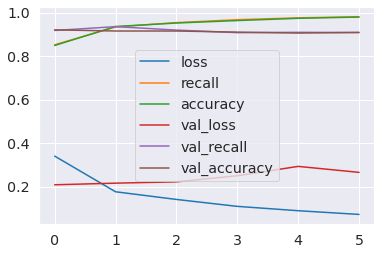

In [111]:
plt.figure(figsize=(20, 8))
pd.DataFrame(history.history).plot()
plt.show()

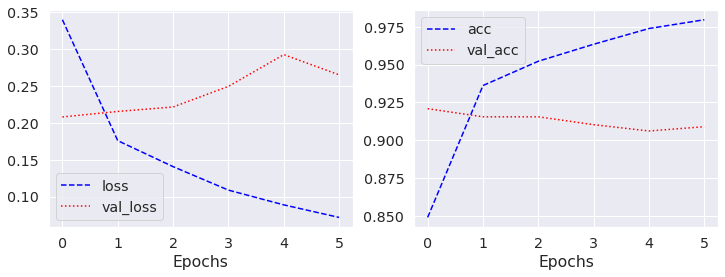

In [112]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [113]:
loss, accuracy,recall= model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Loss  :', loss)
print('Accuracy  : {:.4f}'.format(accuracy))
print('Recall  : {:.4f}'.format(recall))

Loss  : 0.2801007628440857
Accuracy  : 0.9035
Recall  : 0.9047


In [114]:
# Test Neural Network
train_x = X_train
train_y = y_train
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(hidden_layer_sizes=(18,18,8,8,8), activation='relu', random_state=1, max_iter=1000).fit(X_train, y_train)

print(clf.score(train_x, train_y))

0.9937882647361129


In [115]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
